<a href="https://colab.research.google.com/github/dvpaa/Hands-on-Machine-Learning/blob/main/Chapter%2006%20%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 6 결정트리
- 결정트리는(decision tree)는 분류와 회귀 작업 그리고 다중출력 작업도 가능한 다재다능 알고리즘
- 매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘

## 작동 원리
1. 데이터를 가장 잘 구분하는 조건을 정한다.
2. 조건을 기준으로 데이터를 두 범주로 나눈다.
3. 나뉜 각 범주의 데이를 잘 구분하는 조건을 다시 정한다.
4. 조건에 따라 각 범주에 속한 데이터를 다시 분할한다.
5. 위 과정을 반복해 최종 결정 값을 구한다.

## 분할 방식
- 결정트리는 노드 내 데이터의 불순도를 최소화하는 방향으로 분할한다.
- **불순도**(impurity)는 한 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 나타내는 정도
- 한 범주에 데이터 한 종류만 있다면 불순도가 최소(혹은 순도가 최대)

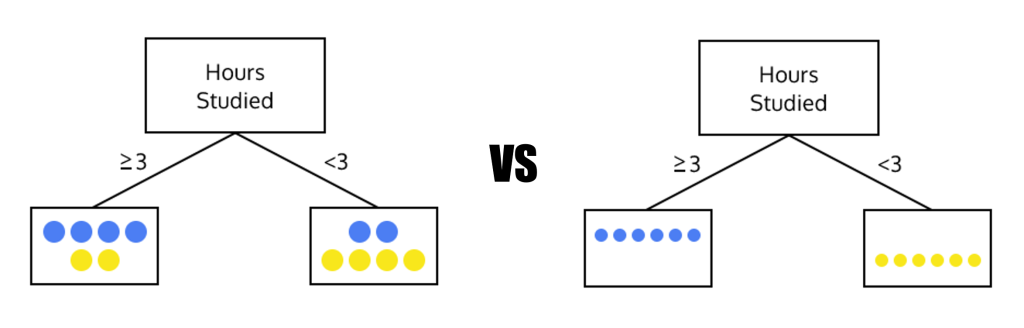

### 불순도를 측정 하는 지표
1. **엔트로피**(entropy)
    - '불확실한 정도'를 뜻한다.
    - 엔트로피 값이 클수록 불순도가 높고, 작을수록 불순도가 낮다.

2. **지니 불순도**(gini impurity)
    - 지니 불순도 값이 클수록 불순도도 높고 작을수록 불순도도 낮다

## 결정트리 학습과 시각화


In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
iris.target[:5]

array([0, 0, 0, 0, 0])

In [6]:
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

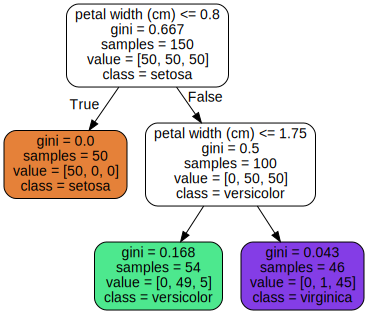

In [8]:
from graphviz import Source

Source.from_file("iris_tree.dot")

## 예측하기
- 새로 발견한 붓꽃의 품종을 분류하려 할때
- 루트 노드에서 시작
- 노드의 조건에 따라 이동해서 리프노드가 되면 검사를 종료
- 노드의 sample 속성은 얼마나 많은 훈련 샘플이 적용되었는지 헤아린 것
- 노드의 gini 속성은 불순도(impurity)를 측정
    - 한 노드의 모든 샘플이 같은 클래스에 속에 있다면 이 노드를 순수(gini=0)하다고 한다
    - 아래 식은 훈련 알고리즘이 $i$번째 노드의 gini 점수 $G_i$를 계산하는 방법
    - 이 식에서 $p_{i,k}$ 는 $i$번째 노드에 있는 훈련 샘플 중 클래스 $k$에 속한 샘플의 비율 

$$ G_i = 1-\sum_{k=1}^n{P_{i,k}}^2 $$

## 클래스 확률 추정
- 결정 트리는 한 샘플이 특정 클래스 $k$에 속할 확률을 추정할 수도 있다.
- 이 샘플에 대해 리프 노드를 찾기 위해 트리를 탐색하고 그 노드에 있는 클래스 $k$의 훈련 샘플의 비율을 반환

In [9]:
# 길이가 5cm, 너비가 1.5cm인 꽃잎이라고 가정
print(tree_clf.predict_proba([[5, 1.5]]))
print(tree_clf.predict([[5, 1.5]]))

[[0.         0.90740741 0.09259259]]
[1]


## CART 훈련 알고리즘
- 사이킷런은 결정 트리를 훈련시키기 위해 CART(classification and regression tree)알고리즘을 사용
- 먼저 훈련 세트를 하나의 특성 $k$의 임겟값 $t_k$를 사용해 두 개의 서브셋으로 나눈다.(예를 들면 petal width <= 0.8)
- 적절한 $k$와 $t_k$를 고르기위해 가장 순수한 서브셋으로 나눌 수 있는 ($k$, $t_k$) 짝을 찾는다.
- 이 알고리즘이 최소화해야 하는 비용 함수는 다음과 같다.

$$ J(k, t_k) = {m_{left}\over m}G_{left} + {m_{right}\over m}G_{right} $$

- $G_{left/right}$는 왼쪽/오른쪽 서브셋의 불순도
- $m_{left/right}$는 왼쪽/오른쪽 서브셋의 셈플 수

- CART 알고리즘이 훈련 세트를 성공적으로 둘로 나누었다면 같은 방식으로 서브셋을 나눈고 최대 깊이 또는 불손도를 줄이는 분할을 찾을 수 없을 때 까지 이 과정을 반복한다.


## 계산 복잡도
- 예측을 하려면 결정 트리를 루트 노드에서부터 리프 노드까지 탐색해야한다.
- 일반적으로 결정 트리는 균형을 이루고 있으므로 약 $O(log_2n)$개의 노드를 거쳐야 한다.
- 각 노드는 하나의 특성값만 확인하기 때문에 예측에 필요한 전체 복잡도는 특성수와 무관하기 때문에 큰 훈련 세트를 다룰 때도 예측 속도가 매우 빠르다

## 지니 불순도 또는 엔트로피?
- 기본적으로 지니 불순도가 사용되지만 criterion 매개변수를 "entropy"로 지정하여 엔트로피 불순도를 사용할 수 있다.

$$H_i = -\sum_{k=1}^n P_{i,k}log_2(P_{i,k}), (p_{i,k} \ne 0)$$

## 규제 매개변수
- 결정 트리는 훈련 데이터에 대한 제약 사항이 거의 없다.
- 제한을 두지 않으면 트리가 훈련 데이터에 과대적합되기 쉽다.
- `max_depth`: 트리의 최대 깊이
- `min_samples_split`: 분할되기 위해 노드가 가져야 하는 최소 샘플 수
- `min_samples_leaf`: 리프 노드가 가지고 있어야 할 최소 샘플 수
- `min_weight_fraction_leaf`: `min_samples_leaf`와 같지만 가중치가 부여된 전체 샘플 수에서의 비율
- `max_leaf_nodes`: 리프 노드의 최대 수
- `max_features`: 각 노드에서 분할에 사용할 특성의 최대 수

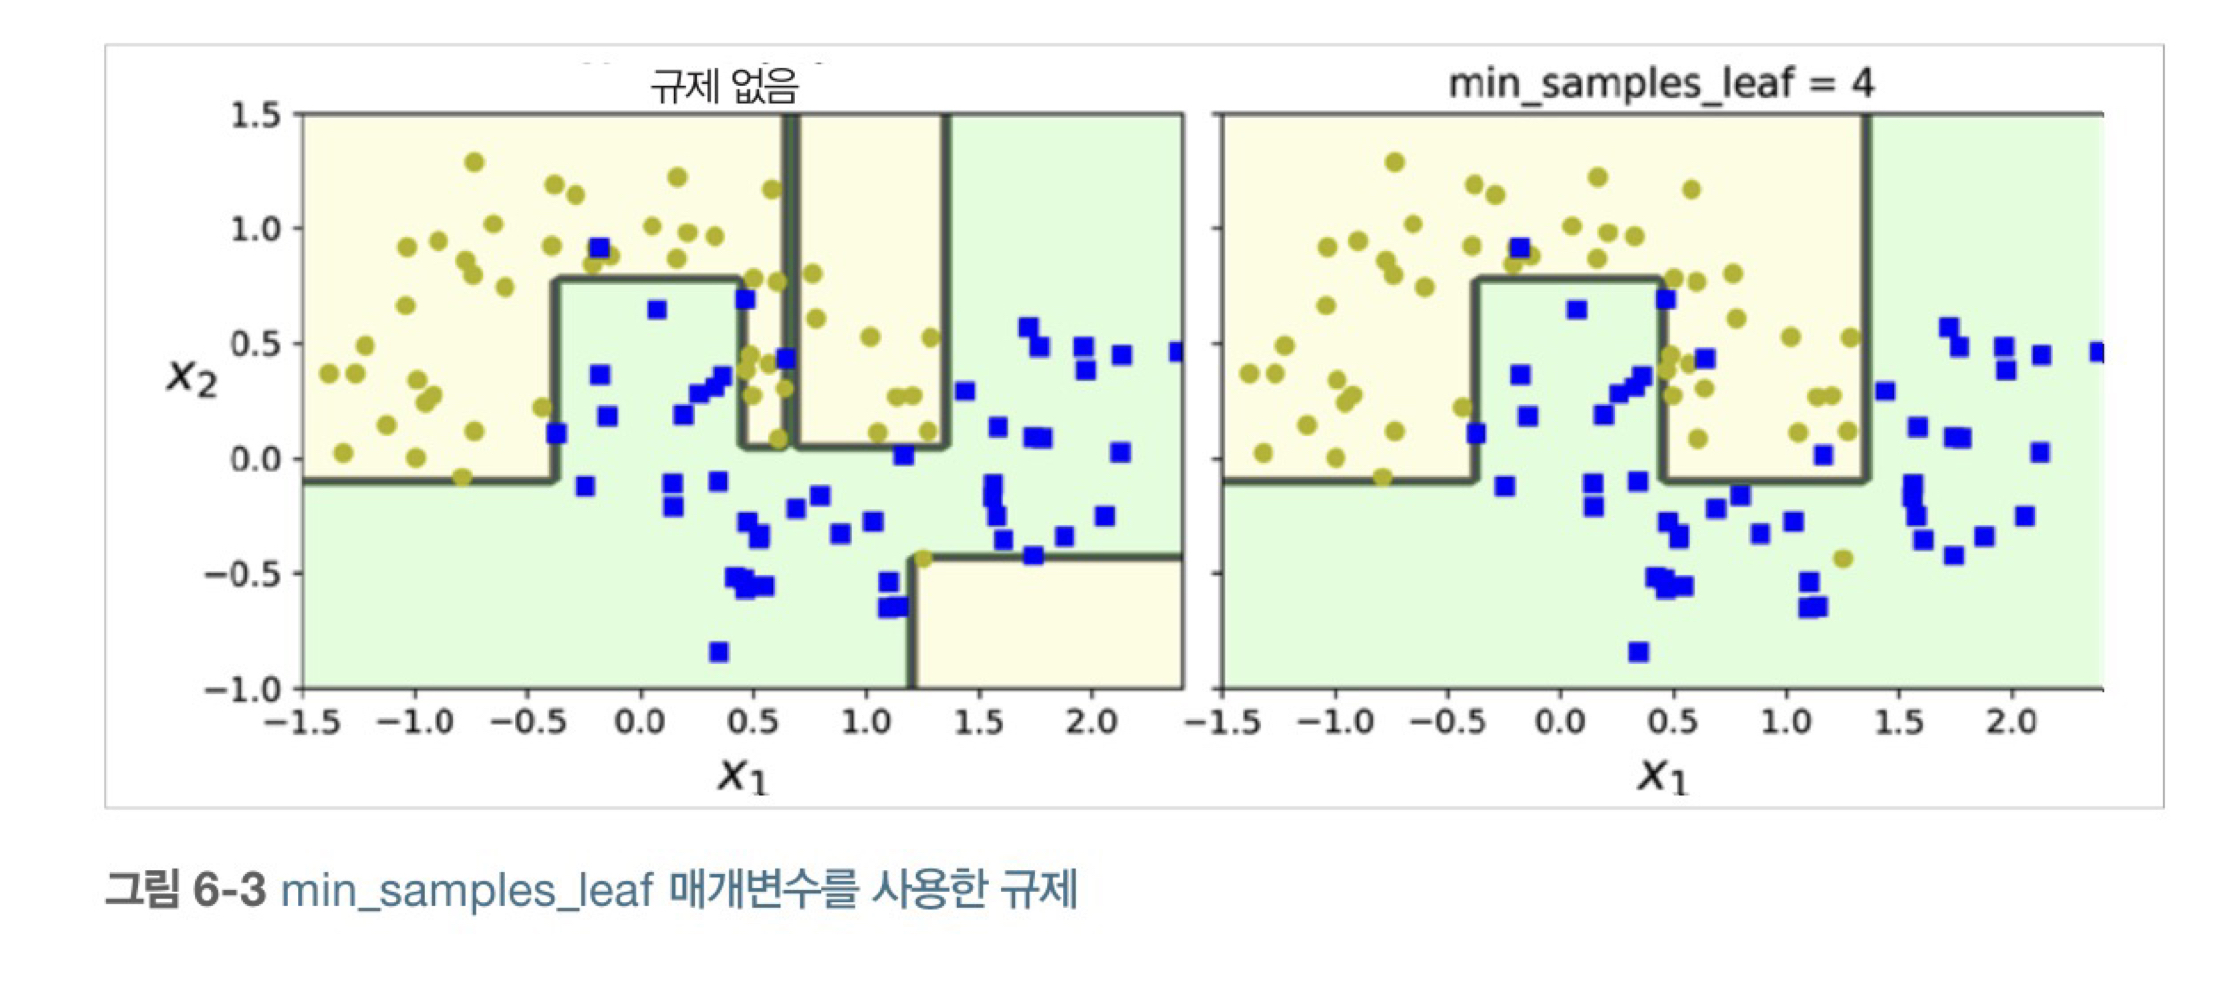

## 불안정성
- 결정 트리는 이해하고 해석하기 쉬우며, 사용하기 편하고, 성능도 뛰어나다.
- 하지만 몇 가지 제한 사항이 있다.
    - 결정 트리는 계단 모양의 결정 경계를 만들어 훈련 세트의 회전에 민감하다.
    - 훈련 데이터에 있는 작은 변화에도 매우 민감하다.
    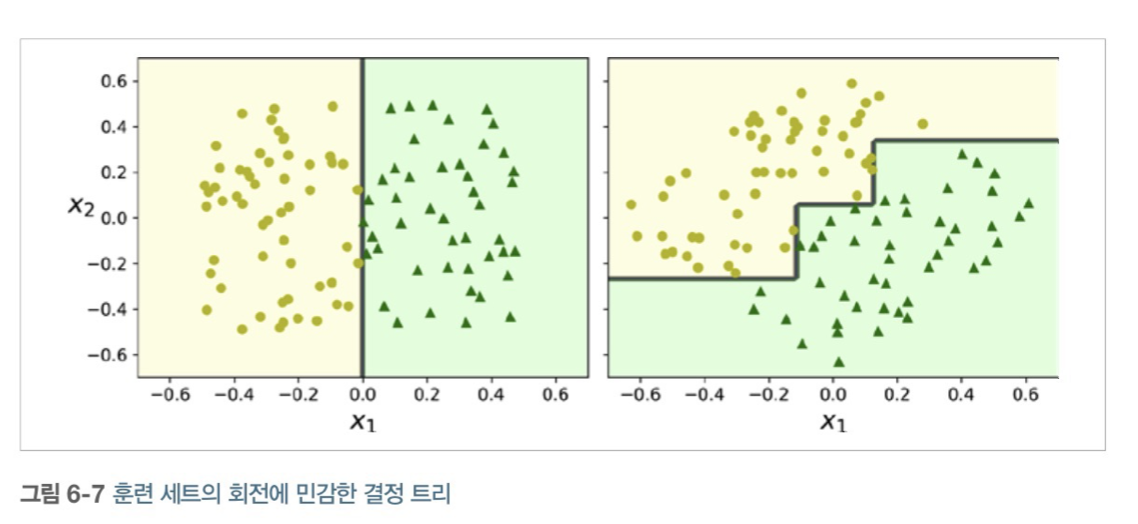